<a href="https://colab.research.google.com/github/Abhs1897/NLP/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv("Reviews.csv")
df=df.sample(1000)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
15992,15993,B001EQ4CJO,A2SLCOXXCITMBF,"iypoon ""drunken scholar""",0.0,1.0,5.0,1.308182e+09,Tastiest walnuts ever,"Note: I bought these from a grocery store, so ..."
15594,15595,B000255OIG,A265LZUGGVNVIV,Sandra,1.0,1.0,5.0,1.246666e+09,Pro-treat Freeze Dried Beef Liver,My Husky has always been a little 'picky' when...
14755,14756,B0002XIAXE,A1PVSEXI32HWSF,"Thomas C. Heagy ""heagy1""",0.0,0.0,5.0,1.348186e+09,This is the best,I have tased a variety of molasses brands over...
4417,4418,B000E5AO8O,A5F8U8018NH9W,Becky Lower,2.0,2.0,5.0,1.218413e+09,Bit O' Honey,"They're almost gone already, and I'm about 5 p..."
7594,7595,B000CQ6KSI,A1RGF3RQUMPUMK,Sarah Croft-Whelan,3.0,5.0,2.0,1.168301e+09,It may be good if I could get the lumps out,I have been disappointed with this product. W...


In [7]:
print(df.shape)

(1000, 10)


In [8]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [9]:
df["Score"].value_counts()

Score
5.0    645
4.0    128
1.0     90
3.0     89
2.0     48
Name: count, dtype: int64

In [10]:
score_values=df["Score"].value_counts()

In [12]:
df.iloc[0,[2,3]]

UserId                   A2SLCOXXCITMBF
ProfileName    iypoon "drunken scholar"
Name: 15992, dtype: object

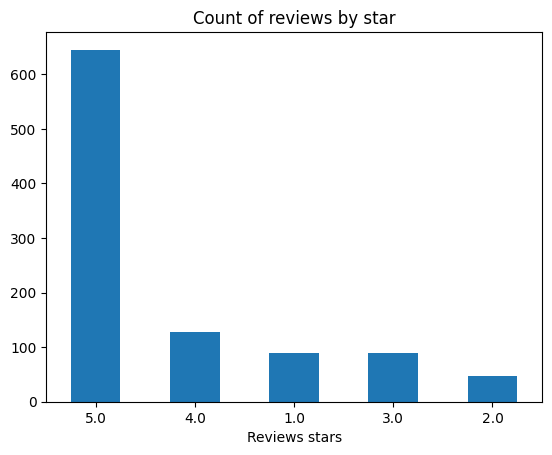

In [13]:
ax=score_values.plot(kind='bar',title='Count of reviews by star')
ax.set_xlabel('Reviews stars')
plt.xticks(rotation=0)
plt.show()

In [14]:
example=df.sample()
example_review=example["Text"].iloc[0]
example_review

"i absolutely love the coach's oatmeal. i hated oatmeal till i tasted coach oatmeal, my first 2 bags bought them at Costco,now Costco  doesn't carry them anymore,so went on line to find coach 's oatmeal and amazon carry them i was so happy that i found  them...i have oatmeal almost everyday with couple of dry dates , tsp.of cream, half of tsp. of almond butter.or crunchy peanut  butter...keep me full for few hrs..I  love the texture kind of nutty.i hate mushy oatmeal.i absolutely  recommend  coach's oat meal u will love it...hope these will help you to decide."

In [15]:
# print(example_review.loc[584])
# print(example_review.iloc[0])

In [20]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
#Tokenization
tokens=nltk.word_tokenize(example_review)

In [22]:
#Part of speech, example nouns,verb,etc
tags=nltk.pos_tag(tokens)

In [23]:
#Grouping tags into chunks
entities=nltk.chunk.ne_chunk(tags)

In [24]:
#Vader Model
#Categorizes words in text into negative,neutral,positive
#Doesn't take into account the relationship between words
#Removes stop words
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#tqdm is a popular Python library that provides a simple and convenient way to add progress bars to loops and iterable objects
sia=SentimentIntensityAnalyzer()

In [25]:
#Gives a sense of how negative or positive the sentence is
#Compund score gives overall value
score1=sia.polarity_scores("I'm so happy!")
score2=sia.polarity_scores("I'm annoyed by the weather")
print(score1)
print(score2)

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}
{'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.3818}


In [26]:
sia.polarity_scores(example_review)

{'neg': 0.07, 'neu': 0.706, 'pos': 0.224, 'compound': 0.9553}

In [27]:
#Running polarity score on entire dataset
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=str(row["Text"])
  myid=row["Id"]
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [28]:
len(res)

1000

In [29]:
vaders=pd.DataFrame(res).T

In [30]:
vaders=vaders.reset_index().rename(columns={'index':'Id'})

In [31]:
vaders=vaders.merge(df,how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,15993,0.043,0.775,0.181,0.9293,B001EQ4CJO,A2SLCOXXCITMBF,"iypoon ""drunken scholar""",0.0,1.0,5.0,1.308182e+09,Tastiest walnuts ever,"Note: I bought these from a grocery store, so ..."
1,15595,0.000,0.709,0.291,0.9591,B000255OIG,A265LZUGGVNVIV,Sandra,1.0,1.0,5.0,1.246666e+09,Pro-treat Freeze Dried Beef Liver,My Husky has always been a little 'picky' when...
2,14756,0.000,0.860,0.140,0.8910,B0002XIAXE,A1PVSEXI32HWSF,"Thomas C. Heagy ""heagy1""",0.0,0.0,5.0,1.348186e+09,This is the best,I have tased a variety of molasses brands over...
3,4418,0.000,1.000,0.000,0.0000,B000E5AO8O,A5F8U8018NH9W,Becky Lower,2.0,2.0,5.0,1.218413e+09,Bit O' Honey,"They're almost gone already, and I'm about 5 p..."
4,7595,0.062,0.843,0.095,0.4125,B000CQ6KSI,A1RGF3RQUMPUMK,Sarah Croft-Whelan,3.0,5.0,2.0,1.168301e+09,It may be good if I could get the lumps out,I have been disappointed with this product. W...


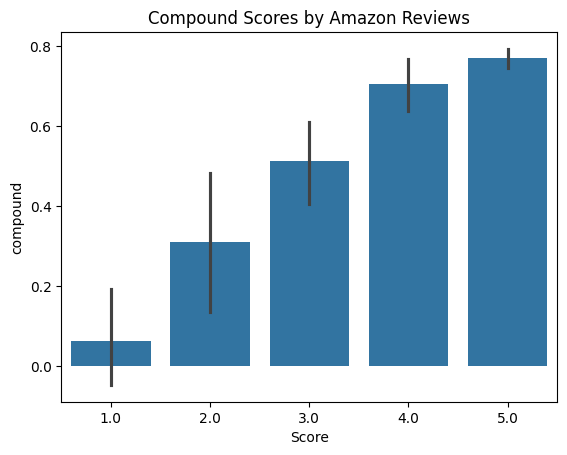

In [32]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title("Compound Scores by Amazon Reviews")
plt.show()

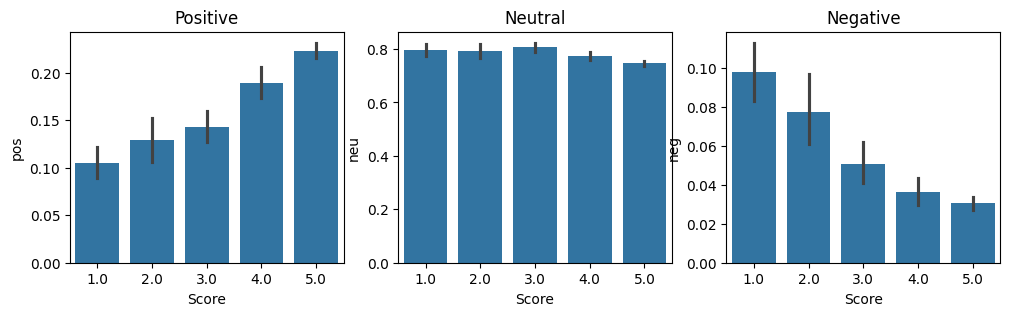

In [33]:
fig,axs=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos', ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu', ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg', ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.show()

In [34]:
#Roberta Pretrained Models
#Pretrained model, which accounts for words as well as their context in the sentence

!pip install transformers

In [35]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [37]:
def polarity_scores_roberta(example):
  encoded_text=tokenizer(example_review,return_tensors='pt')
  #Returns tensor in pytorch format
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
  }
  return scores_dict

In [38]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  try:
    text=row["Text"]
    myid=row["Id"]
    vader_results=sia.polarity_scores(text)
    vader_result_rename={}
    for key,value in vader_results.items():
      vader_result_rename[f"vader_{key}"]=value
    roberta_results=polarity_scores_roberta(text)
    both={**vader_result_rename,**roberta_results}
    res[myid]=both
  except:
    print(f"Broke for id {myid}")

  0%|          | 0/1000 [00:00<?, ?it/s]

In [53]:
len(res)

1000

In [39]:
#encoded_text

In [43]:
#Exploring the transformer preprocessing step
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

In [44]:
encoded_input = tokenizer("Do not meddle in the affairs of wizards, for they are subtle and quick to anger.")
print(encoded_input)

{'input_ids': [101, 2091, 1136, 1143, 13002, 1107, 1103, 5707, 1104, 16678, 1116, 117, 1111, 1152, 1132, 11515, 1105, 3613, 1106, 4470, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


The tokenizer returns a dictionary with three important items:<br>

<b>input_ids</b> are the indices corresponding to each token in the sentence.<br>
<b>attention_mask</b> indicates whether a token should be attended to or not.<br>
<b>token_type_ids</b> identifies which sequence a token belongs to when there is more than one sequence.

In [45]:
tokenizer.decode(encoded_input["input_ids"])

'[CLS] Do not meddle in the affairs of wizards, for they are subtle and quick to anger. [SEP]'

<b>Pad</b><br>
Sentences aren’t always the same length which can be an issue because tensors, the model inputs, need to have a uniform shape. Padding is a strategy for ensuring tensors are rectangular by adding a special padding token to shorter sentences.<br>
<b>Truncation</b><br>
On the other end of the spectrum, sometimes a sequence may be too long for a model to handle. In this case, you’ll need to truncate the sequence to a shorter length.

In [65]:
res_df=pd.DataFrame(res).T
res_df=res_df.reset_index().rename(columns={"index":"Id"})
res_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,15993,0.043,0.775,0.181,0.9293,0.02925,0.069841,0.900909
1,15595,0.000,0.709,0.291,0.9591,0.02925,0.069841,0.900909
2,14756,0.000,0.860,0.140,0.8910,0.02925,0.069841,0.900909
3,4418,0.000,1.000,0.000,0.0000,0.02925,0.069841,0.900909
4,7595,0.062,0.843,0.095,0.4125,0.02925,0.069841,0.900909


In [63]:
res_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
      dtype='object')

In [64]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [66]:
res_df=res_df.merge(df,how='left')
res_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,15993,0.043,0.775,0.181,0.9293,0.02925,0.069841,0.900909,B001EQ4CJO,A2SLCOXXCITMBF,"iypoon ""drunken scholar""",0.0,1.0,5.0,1.308182e+09,Tastiest walnuts ever,"Note: I bought these from a grocery store, so ..."
1,15595,0.000,0.709,0.291,0.9591,0.02925,0.069841,0.900909,B000255OIG,A265LZUGGVNVIV,Sandra,1.0,1.0,5.0,1.246666e+09,Pro-treat Freeze Dried Beef Liver,My Husky has always been a little 'picky' when...
2,14756,0.000,0.860,0.140,0.8910,0.02925,0.069841,0.900909,B0002XIAXE,A1PVSEXI32HWSF,"Thomas C. Heagy ""heagy1""",0.0,0.0,5.0,1.348186e+09,This is the best,I have tased a variety of molasses brands over...
3,4418,0.000,1.000,0.000,0.0000,0.02925,0.069841,0.900909,B000E5AO8O,A5F8U8018NH9W,Becky Lower,2.0,2.0,5.0,1.218413e+09,Bit O' Honey,"They're almost gone already, and I'm about 5 p..."
4,7595,0.062,0.843,0.095,0.4125,0.02925,0.069841,0.900909,B000CQ6KSI,A1RGF3RQUMPUMK,Sarah Croft-Whelan,3.0,5.0,2.0,1.168301e+09,It may be good if I could get the lumps out,I have been disappointed with this product. W...


In [67]:
res_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [56]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

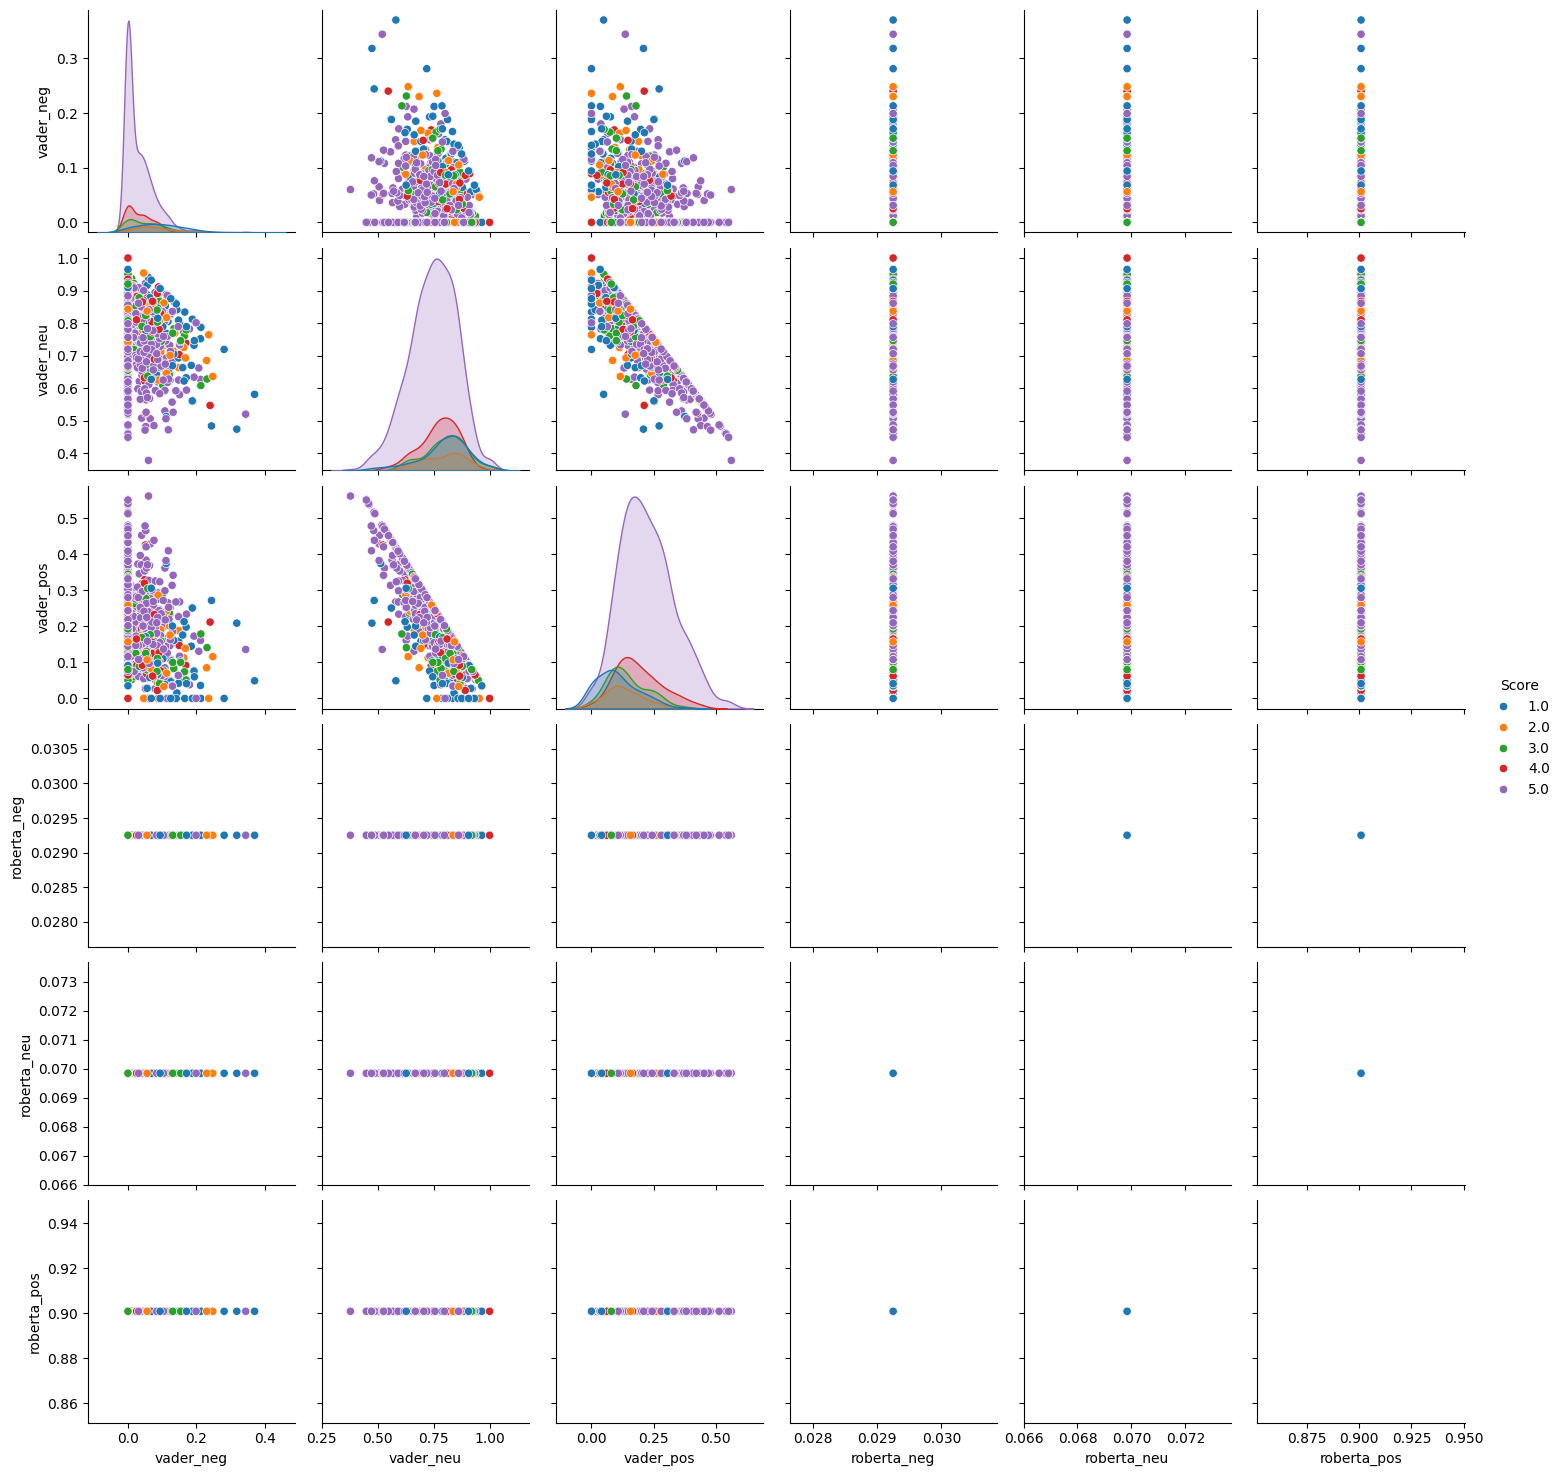

In [68]:
#Compare scores between models
sns.pairplot(data=res_df,
             vars= ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

In [ ]:
#Examples
res_df.query('Score==1')\
.sort_values('roberta_pos',ascending=False)['Text'].values[0]